**TABLE OF CONTENT:**
1. Uploading the necessary packages;
2. import the dataset by setting the dates as an index;
3. plot to view Apple's closing price trend from May 2018 to May 2024;
4. creation of the new dataframe with only the closures column and conversion to numpy array;
5. get the number of rows to train the model on;
6. scaling the data within a range 0-1;
7. create the scaled training dataset, split the data into x_train and y_train data sets and convert the the latter into numpy arrays;
8. reshape the data;
9. same procedure as in step 7 and 8 but with the testing;dataset;
10. build and compile the LSTM model;
11. train the model;
12. plot the loss-per-epoch;
13. get the models predicted price values;
14. get the root mean squared error (RMSE);
15. plot and visualize the data.


**1. Uploading the necessary packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

**2. Import the dataset by setting the dates as an index**

In [ ]:
AAPL= pd.read_csv("AAPL2018.csv", index_col='Date', parse_dates= True)
print(AAPL)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   42.540001   43.075001   42.314999   43.064999   40.670971   
2018-01-03   43.132500   43.637501   42.990002   43.057499   40.663891   
2018-01-04   43.134998   43.367500   43.020000   43.257500   40.852787   
2018-01-05   43.360001   43.842499   43.262501   43.750000   41.317902   
2018-01-08   43.587502   43.902500   43.482498   43.587502   41.164436   
...                ...         ...         ...         ...         ...   
2024-05-03  186.649994  187.000000  182.660004  183.380005  183.380005   
2024-05-06  182.350006  184.199997  180.419998  181.710007  181.710007   
2024-05-07  183.449997  184.899994  181.320007  182.399994  182.399994   
2024-05-08  182.850006  183.070007  181.449997  182.740005  182.740005   
2024-05-09  182.559998  184.660004  182.110001  184.570007  184.570007   

               Volume  
Date         

**3. Plot to view Apple's closing price trend from May 2018 to May 2024**

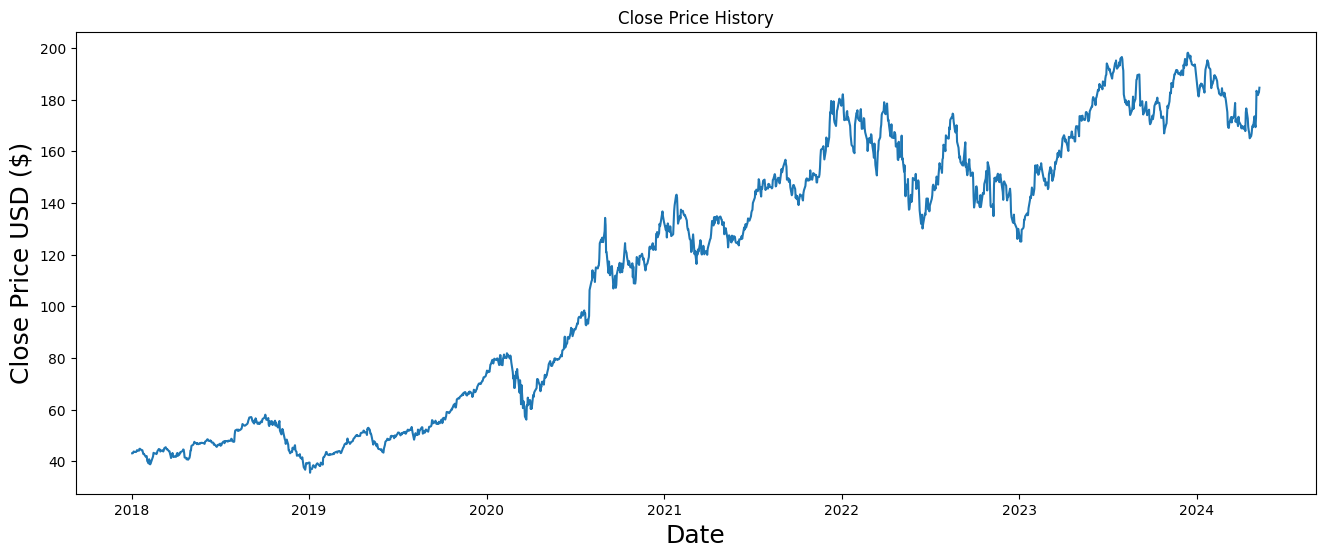

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(AAPL['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Now normally you should check for stationarity and if your data is non stationary you would have to make it stationary to fit the model. But in this case we are using a RNN which is able to learn also really complex patterns, therefor it doesn't need stationary data.

**4. Creation of the new dataframe with only the closures column and conversion to numpy array**

Converting values to numpy arrays in data preprocessing for LSTM models is a standard practice that improves efficiency and data management, facilitating the development and implementation of complex predictive models.


In [ ]:
AAPL_close = AAPL.filter(['Close'])
AAPL_array = AAPL_close.values
AAPL_array

array([[ 43.064999],
       [ 43.057499],
       [ 43.2575  ],
       ...,
       [182.399994],
       [182.740005],
       [184.570007]])

**5. Get the number of rows to train the model on**

Calculated the number of rows to be used for model training by subtracting 251 days from the total because they will be used for model testing. The value 251 represents the number of days in a year excluding weekends and holidays.

The np.ceil() function rounds to the nearest integer upward, ensuring that even if the result of the subtraction is a decimal number, the number of rows will always be an integer that is not less than the number needed for training.


In [ ]:
AAPL_arr_train_len = int(np.ceil( len(AAPL_array) - 251 ))
AAPL_arr_train_len

1348

**6. Scaling the data within a range 0-1**

These lines of code implement the normalization of Apple's closing stock price time series data using a MinMaxScaler() object from the scikit-learn library. In this case MinMaxScaler() normalizes the data in the range [0, 1], often, machine learning models such as neural networks perform best with input data that are on a scale of 0 to 1.

The fit_transform() function does two things: first it fits the scaler to the data by calculating the minimum and maximum of the values in the array, and then it transforms the data by actually rescaling each data point in the specified range.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
AAPL_arr_scaled = scaler.fit_transform(AAPL_array)
AAPL_arr_scaled


array([[0.04624374],
       [0.0461976 ],
       [0.04742791],
       ...,
       [0.9033602 ],
       [0.90545177],
       [0.916709  ]])

**7. Create the scaled training dataset, split the data into x_train and y_train data sets and convert the the latter into numpy arrays**

Now the training datasets for the LSTM model are prepared:
The for loop constructs sequential data sets where x_train contains 30-day sequences of closing prices and y_train contains the next day's closing price;
The condition if i<= 31 is used to print only the first two training data sets for verification.

Then the x_train and y_train lists are converted to numpy arrays for model training.

In [ ]:
AAPL_train = AAPL_arr_scaled[0:int(AAPL_arr_train_len), :]
x_train = []
y_train = []

for i in range(30, len(AAPL_train)):
    x_train.append(AAPL_train[i-30:i, 0])
    y_train.append(AAPL_train[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

[array([0.04624374, 0.0461976 , 0.04742791, 0.05045751, 0.04945791,
       0.04942714, 0.04936561, 0.05088811, 0.05367165, 0.05228758,
       0.05676279, 0.05700883, 0.05577855, 0.05353325, 0.05359475,
       0.04925797, 0.0444752 , 0.04509034, 0.03963092, 0.03810841,
       0.03881582, 0.03935409, 0.02815839, 0.02199154, 0.03204921,
       0.02668203, 0.01993078, 0.02186851, 0.0315571 , 0.03406381])]
[0.03872355555555554]

[array([0.04624374, 0.0461976 , 0.04742791, 0.05045751, 0.04945791,
       0.04942714, 0.04936561, 0.05088811, 0.05367165, 0.05228758,
       0.05676279, 0.05700883, 0.05577855, 0.05353325, 0.05359475,
       0.04925797, 0.0444752 , 0.04509034, 0.03963092, 0.03810841,
       0.03881582, 0.03935409, 0.02815839, 0.02199154, 0.03204921,
       0.02668203, 0.01993078, 0.02186851, 0.0315571 , 0.03406381]), array([0.0461976 , 0.04742791, 0.05045751, 0.04945791, 0.04942714,
       0.04936561, 0.05088811, 0.05367165, 0.05228758, 0.05676279,
       0.05700883, 0.05577855, 0.

**8. Reshape the data**

The np.reshape() function is used to change the shape of the array to a format compatible with the input of an LSTM model.

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1318, 30, 1)

**9. Same procedure as in step 7 and 8 but with the testing dataset**

The variable AAPL_test contains the data that will be used to test the model after training; we start taking data from 30 days before the end of the training set to have a complete sequence for the first prediction.

The for loop builds x_test similarly to how x_train was built.
y_test contains the actual values that the model will try to predict, and is taken directly from the original AAPL_array starting at the point where the test set begins.

In [ ]:
AAPL_test = AAPL_arr_scaled[AAPL_arr_train_len - 30: , :]
x_test = []
y_test = AAPL_array[AAPL_arr_train_len:, :]
for i in range(30, len(AAPL_test)):
    x_test.append(AAPL_test[i-30:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

**10. Build and compile the LSTM model**

With the Sequential() function you initialize a new sequential model, which is a type of model in Keras that allows you to create neural networks by adding layers sequentially, one after the other.

The first LSTM layer with 124 neurons, return_sequences = True (indicates that the output of this layer will be a sequence) and input_shape defines the shape of the input that the model expects, where x_train.shape[1] is the number of timesteps.

The second LSTM layer with 62 neurons and return_sequences = False as this layer will only return the output of the last timestep, which is useful for making predictions based on the whole sequence.

Next two Dense layers, the first has 10 neurons and the second has only one neuron, which will be the output of the model, these are used to learn nonlinear relationships from the data.

Finally, the model is compiled by specifying the optimizer and loss function: optimizer = 'adam' is a common effective optimization algorithm, while loss = 'mean_squared_error' is a loss function that calculates the mean square difference between the predicted and actual values.

In [ ]:
model = Sequential()
model.add(LSTM(124, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(62, return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

**11. Train the model**

Training neural networks such as LSTMs is an iterative process that seeks to optimize the network weights to make the most accurate predictions possible.

By running model.fit(), the model begins training by iterating through the training dataset for the specified number of epochs, updating the network weights with each iteration to minimize the loss function, which in this case is the mean squared error.

Epochs = 20 specifies the number of times the entire dataset will be passed through the model. In this case, the model will see the training dataset 20 times.

Batch_size = 1 indicates that the model will only be trained using one example at a time.

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
1318/1318 [==============================] - 96s 69ms/step - loss: 0.0022
Epoch 2/20
1318/1318 [==============================] - 96s 73ms/step - loss: 8.4043e-04
Epoch 3/20
1318/1318 [==============================] - 96s 73ms/step - loss: 7.2612e-04
Epoch 4/20
1318/1318 [==============================] - 86s 65ms/step - loss: 5.9403e-04
Epoch 5/20
1318/1318 [==============================] - 93s 71ms/step - loss: 4.6303e-04
Epoch 6/20
1318/1318 [==============================] - 100s 76ms/step - loss: 4.0603e-04
Epoch 7/20
1318/1318 [==============================] - 89s 67ms/step - loss: 4.9373e-04
Epoch 8/20
1318/1318 [==============================] - 102s 77ms/step - loss: 4.1646e-04
Epoch 9/20
1318/1318 [==============================] - 88s 67ms/step - loss: 4.2566e-04
Epoch 10/20
1318/1318 [==============================] - 92s 70ms/step - loss: 4.3034e-04
Epoch 11/20
1318/1318 [==============================] - 95s 72ms/step - loss: 3.3589e-04
Epoch 12/20
1318/1318

**12. Plot the loss-per-epoch**

With these two lines of code, we display a graph of the loss for each epoch during the training of the model,
we will retrieve the list of loss values that the model recorded at the end of each epoch during training.

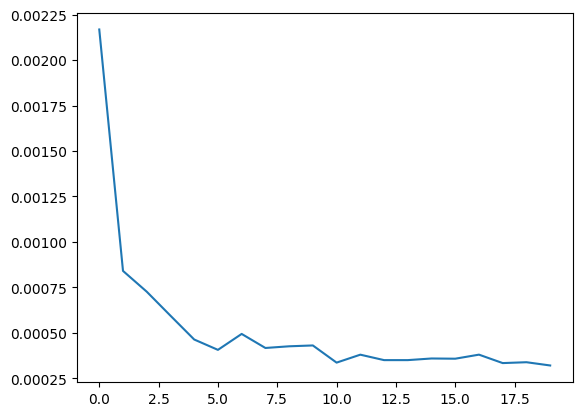

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

We can observe a graph showing how the loss of the model changes at each epoch, specifically we see the loss decrease as the model learns from the training data. If the loss does not decrease or starts to increase, it could be a sign of overfitting or other problems in the training process, in the case above in fact the loss decreases and this is a sign that the model is good.

**13. Get the models predicted price values**

The trained LSTM model is used to make predictions on test data, the model generates predicted values based on what it has learnt during training.

It is necessary to apply an inverse transformation to return the predictions to their original scale, this is important to interpret the results correctly.

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 2s 222ms/step


**14. Get the root mean squared error (RMSE)**

Calculate the root mean square error (RMSE) and its normalised value (NRMSE) for your LSTM model predictions.

In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
nrmse = rmse / (max(y_test) - min(y_test))
print(rmse)
print(nrmse)

2.806271858015385
[0.08475602]


With these values, one can get an idea of how well the model is performing.
A low RMSE indicates that the model has good prediction accuracy.

**15. Plot and visualize the data**

This graph allows a visual comparison of model performance against actual data, showing where the model has made accurate predictions and where there may be room for improvement.

<ipython-input-77-63f57d718a34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


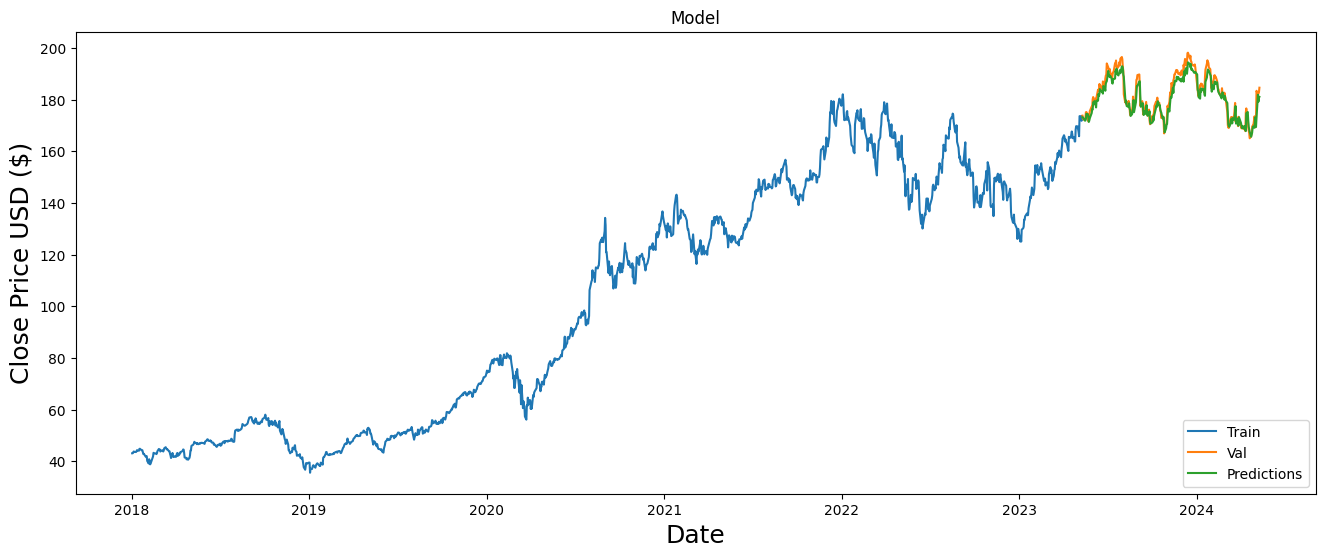

In [ ]:
# Plot the data
train = AAPL_close[:AAPL_arr_train_len]
valid = AAPL_close[AAPL_arr_train_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Analysing the performance graph of the model, it can be seen that the lines of the validation and forecast data overlap significantly. This suggests that the model is able to capture the trend of Apple's closing share price with a high degree of accuracy. Minor discrepancies between the two lines can be attributed to natural variations in the data or market events not captured by the model.

This type of result is generally what one looks for when evaluating a machine learning model, however, it is also important to consider other factors such as overfitting, where the model may be overfitting the training data and not generalising well to new data.

In [ ]:
valid

,Close,Predictions
Date,,
2023-05-11,173.750000,173.139862
2023-05-12,172.570007,173.109116
2023-05-15,172.070007,172.116577
2023-05-16,172.070007,171.827438
2023-05-17,172.690002,171.842529
...,...,...
2024-05-03,183.380005,172.801300
2024-05-06,181.710007,181.832504
2024-05-07,182.399994,179.153809
